# Circular barplot with groups in Matplotlib

In [45]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [2]:
#Ensure reproducability of random numbers
rng=np.random.default_rng(123)

In [10]:
#Build Dataset
df= pd.DataFrame({"name": [f"item{i}" for i in range (1,51)],
                   "value":rng.integers(low=30,high=100,size=50),
                   "group":["A"]*10+["B"]*20+["C"]*12+["D"]*8})

In [13]:
df.head(2)

,name,value,group
0,item1,31,A
1,item2,77,A


In [14]:
def get_label_rotation(angle, offset):
    #Rotation must be specified in degree
    rotation= np.rad2deg(angle+offset)
    if angle < np.pi:
        alignment = "right"
        rotation = rotation+180
    else:
        alignment = "left"
    return  rotation, alignment

In [34]:
def add_labels(angles,values, labels, offset, ax):
    #This is the space between end of the bar and the label
    padding=4
    
    #iterate over angles,values, and labels to add all of them
    for angle, value, label, in zip(angles,values,labels):
        angle=angle
        
        #obtain text rotationand alignment
        rotation, alignment= get_label_rotation(angle, offset)
        
        #and finally add the text
        ax.text(
            x=angle,
            y=value+padding,
            s=label,
            ha=alignment,
            va="top",
            rotation=rotation,
            rotation_mode="anchor"
        )

### Basic circular barplot with labels

In [18]:
ANGLES= np.linspace(0,2*np.pi,len(df),endpoint=False)
VALUES=df["value"].values
LABELS= df["name"].values

In [19]:
#determine  width of each bar
WIDTH=2*np.pi/len(VALUES)

In [20]:
#determine where to place first bar
#by default it starts at 0
#but here we want it to start from pi/2 ie 90 degree
OFFSET=np.pi/2

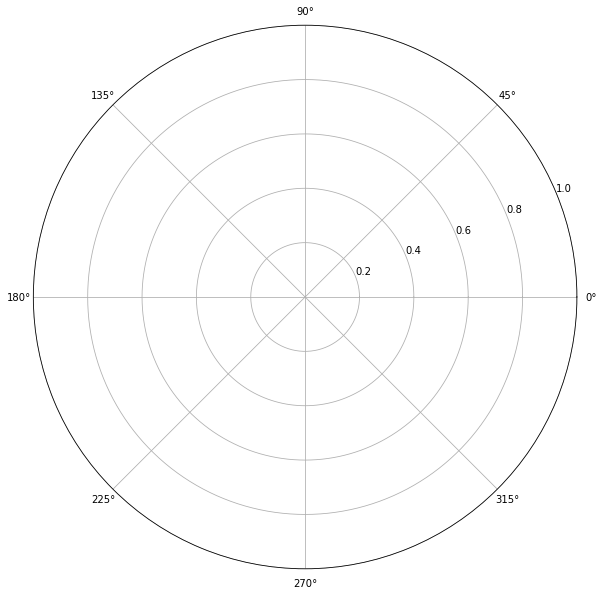

In [21]:
#Initialize figure and axes
fig, ax=plt.subplots(figsize=(20,10), subplot_kw={"projection":"polar"})

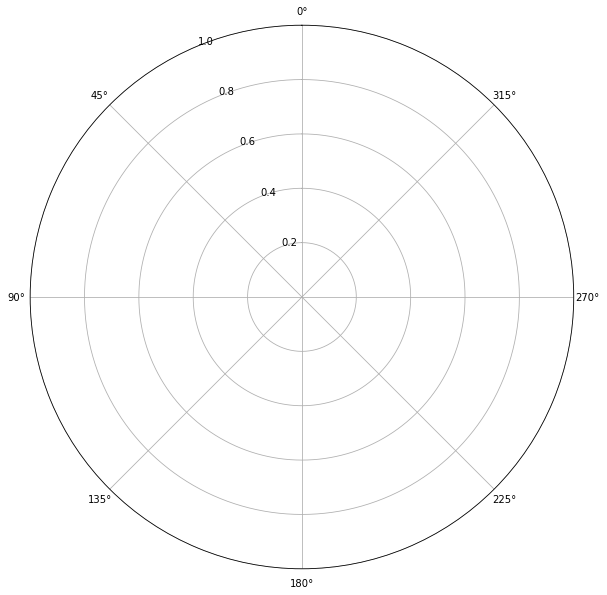

In [22]:
#Initialize figure and axes
fig, ax=plt.subplots(figsize=(20,10), subplot_kw={"projection":"polar"})
#specify offset
ax.set_theta_offset(OFFSET)

(-100.0, 100.0)

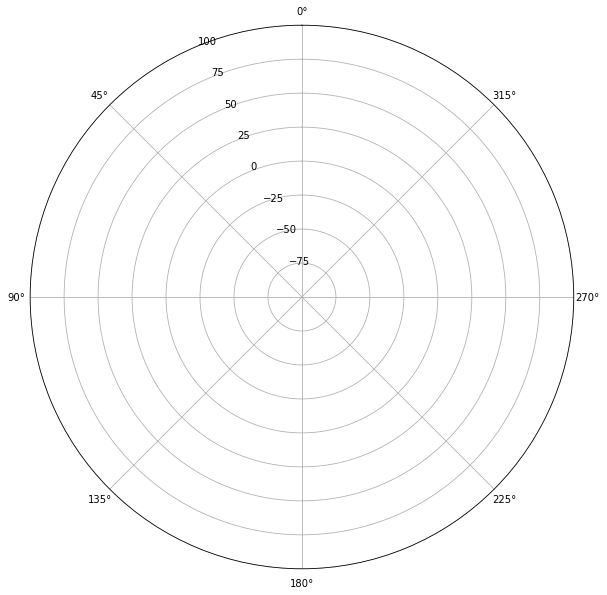

In [23]:
#Initialize figure and axes
fig, ax=plt.subplots(figsize=(20,10), subplot_kw={"projection":"polar"})
#specify offset
ax.set_theta_offset(OFFSET)
#set limits for radial y axis , the negative lower bound create the whole in middle
ax.set_ylim(-100, 100)

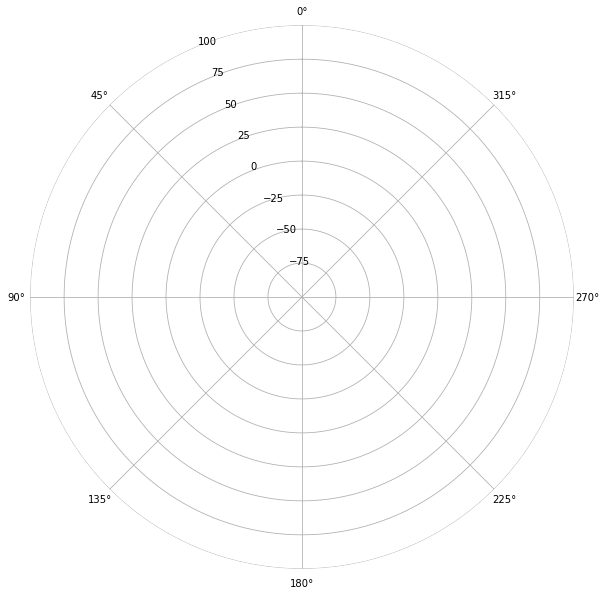

In [24]:
#Initialize figure and axes
fig, ax=plt.subplots(figsize=(20,10), subplot_kw={"projection":"polar"})
#specify offset
ax.set_theta_offset(OFFSET)
#set limits for radial y axis , the negative lower bound create the whole in middle
ax.set_ylim(-100, 100)
#remove all spines
ax.set_frame_on(False)

<BarContainer object of 50 artists>

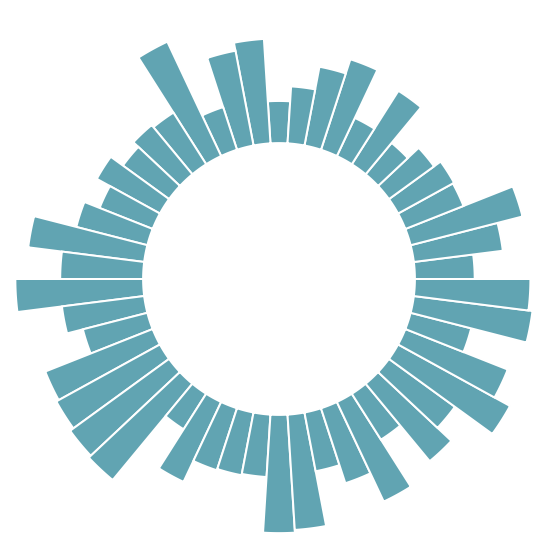

In [30]:
#Initialize figure and axes
fig, ax=plt.subplots(figsize=(20,10), subplot_kw={"projection":"polar"})
#specify offset
ax.set_theta_offset(OFFSET)
#set limits for radial y axis , the negative lower bound create the whole in middle
ax.set_ylim(-100, 100)
#remove all spines
ax.set_frame_on(False)
#remove grid and tick marks
ax.xaxis.grid(False)
ax.yaxis.grid(False)
ax.set_xticks([])
ax.set_yticks([])

#add bars
ax.bar(ANGLES,VALUES,width=WIDTH,linewidth=2, color="#61a4b2", edgecolor="white")
#Add labels
#add_labels(ANGLES,VALUES,LABELS,OFFSET,ax)

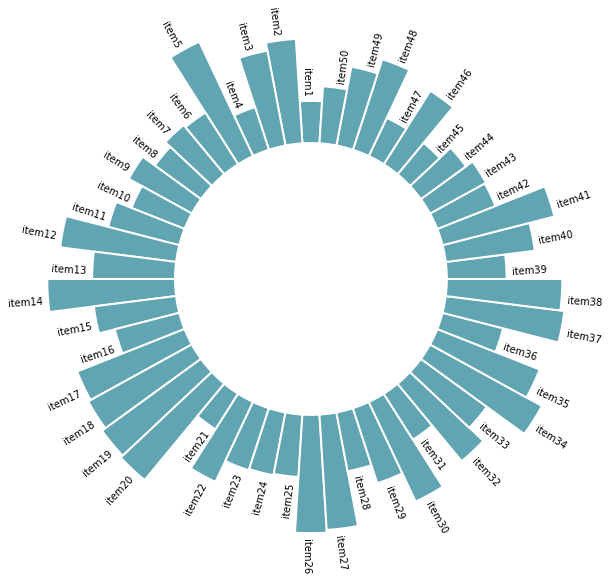

In [35]:
#Initialize figure and axes
fig, ax=plt.subplots(figsize=(20,10), subplot_kw={"projection":"polar"})
#specify offset
ax.set_theta_offset(OFFSET)
#set limits for radial y axis , the negative lower bound create the whole in middle
ax.set_ylim(-100, 100)
#remove all spines
ax.set_frame_on(False)
#remove grid and tick marks
ax.xaxis.grid(False)
ax.yaxis.grid(False)
ax.set_xticks([])
ax.set_yticks([])

#add bars
ax.bar(ANGLES,VALUES,width=WIDTH,linewidth=2, color="#61a4b2", edgecolor="white")
#Add labels
add_labels(ANGLES,VALUES,LABELS,OFFSET,ax)

In [36]:
#3 empty bars are added
PAD=3
ANGLES_N=len(VALUES) + PAD
ANGLES=np.linspace(0,2*np.pi,num=ANGLES_N, endpoint=False)
WIDTH= (2*np.pi)/len(ANGLES)

In [37]:
#The index contains non-empty bards
IDXS=slice(0,ANGLES_N-PAD)

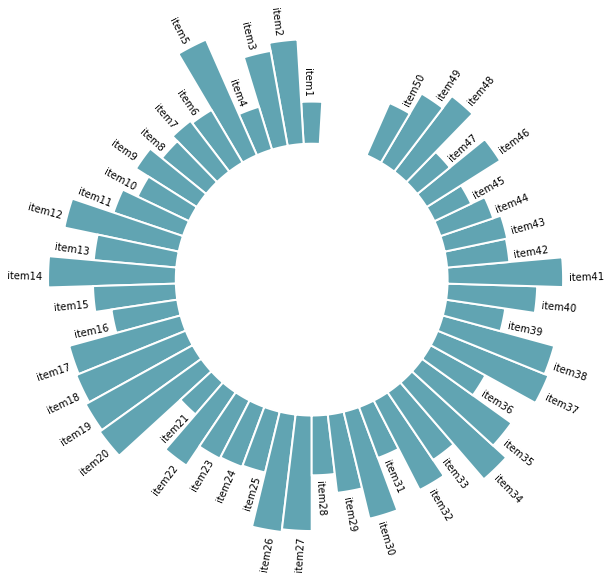

In [39]:
#Layout customization
#Initialize figure and axes
fig, ax=plt.subplots(figsize=(20,10), subplot_kw={"projection":"polar"})
#specify offset
ax.set_theta_offset(OFFSET)
#set limits for radial y axis , the negative lower bound create the whole in middle
ax.set_ylim(-100, 100)
#remove all spines
ax.set_frame_on(False)
#remove grid and tick marks
ax.xaxis.grid(False)
ax.yaxis.grid(False)
ax.set_xticks([])
ax.set_yticks([])

#add bars
ax.bar(ANGLES[IDXS],VALUES,width=WIDTH,linewidth=2, color="#61a4b2", edgecolor="white")
#Add labels
add_labels(ANGLES[IDXS],VALUES,LABELS,OFFSET,ax)

### Space between groups

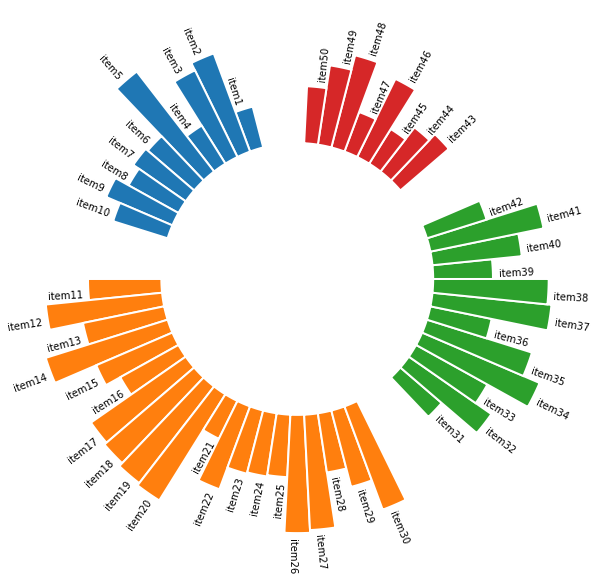

In [41]:
# Grab the group values
GROUP = df["group"].values

# Add three empty bars to the end of each group
PAD = 3
ANGLES_N = len(VALUES) + PAD * len(np.unique(GROUP))
ANGLES = np.linspace(0, 2 * np.pi, num=ANGLES_N, endpoint=False)
WIDTH = (2 * np.pi) / len(ANGLES)

# Obtaining the right indexes is now a little more complicated
offset = 0
IDXS = []
GROUPS_SIZE = [10, 20, 12, 8]
for size in GROUPS_SIZE:
    IDXS += list(range(offset + PAD, offset + size + PAD))
    offset += size + PAD

# Same layout as above
fig, ax = plt.subplots(figsize=(20, 10), subplot_kw={"projection": "polar"})

ax.set_theta_offset(OFFSET)
ax.set_ylim(-100, 100)
ax.set_frame_on(False)
ax.xaxis.grid(False)
ax.yaxis.grid(False)
ax.set_xticks([])
ax.set_yticks([])

# Use different colors for each group!
GROUPS_SIZE = [10, 20, 12, 8]
COLORS = [f"C{i}" for i, size in enumerate(GROUPS_SIZE) for _ in range(size)]

# And finally add the bars. 
# Note again the `ANGLES[IDXS]` to drop some angles that leave the space between bars.
ax.bar(
    ANGLES[IDXS], VALUES, width=WIDTH, color=COLORS, 
    edgecolor="white", linewidth=2
)

add_labels(ANGLES[IDXS], VALUES, LABELS, OFFSET, ax)

### Order bars

In [42]:
# Reorder the dataframe
df_sorted = (
    df
    .groupby(["group"])
    .apply(lambda x: x.sort_values(["value"], ascending = False))
    .reset_index(drop=True)
)

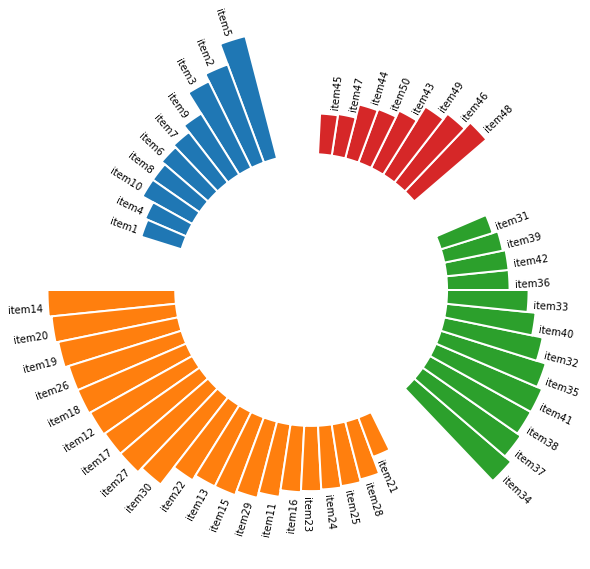

In [43]:
VALUES = df_sorted["value"].values 
LABELS = df_sorted["name"].values
GROUP = df_sorted["group"].values

PAD = 3
ANGLES_N = len(VALUES) + PAD * len(np.unique(GROUP))

ANGLES = np.linspace(0, 2 * np.pi, num=ANGLES_N, endpoint=False)
WIDTH = (2 * np.pi) / len(ANGLES)

offset = 0
IDXS = []
for size in GROUPS_SIZE:
    IDXS += list(range(offset + PAD, offset + size + PAD))
    offset += size + PAD

fig, ax = plt.subplots(figsize=(20, 10), subplot_kw={"projection": "polar"})

ax.set_theta_offset(OFFSET)
ax.set_ylim(-100, 100)
ax.set_frame_on(False)
ax.xaxis.grid(False)
ax.yaxis.grid(False)
ax.set_xticks([])
ax.set_yticks([])

GROUPS_SIZE = [10, 20, 12, 8]
COLORS = [f"C{i}" for i, size in enumerate(GROUPS_SIZE) for _ in range(size)]

# Add bars to represent ...
ax.bar(
    ANGLES[IDXS], VALUES, width=WIDTH, color=COLORS, 
    edgecolor="white", linewidth=2
)

add_labels(ANGLES[IDXS], VALUES, LABELS, OFFSET, ax)

### Circular barchart customization

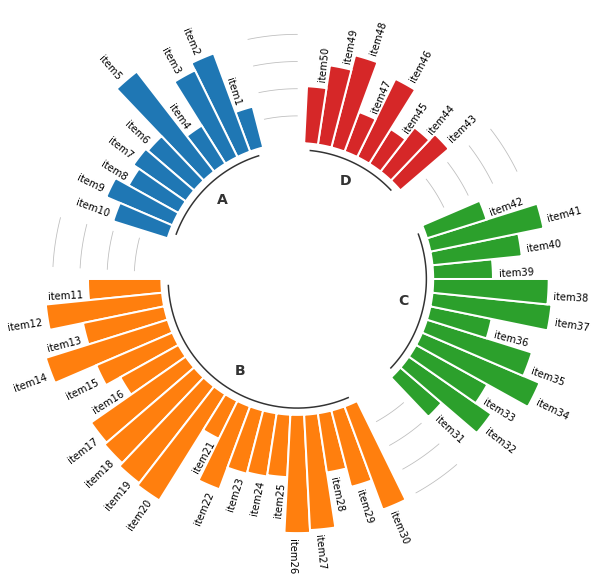

In [44]:
# All this part is like the code above
VALUES = df["value"].values
LABELS = df["name"].values
GROUP = df["group"].values

PAD = 3
ANGLES_N = len(VALUES) + PAD * len(np.unique(GROUP))
ANGLES = np.linspace(0, 2 * np.pi, num=ANGLES_N, endpoint=False)
WIDTH = (2 * np.pi) / len(ANGLES)

offset = 0
IDXS = []
GROUPS_SIZE = [10, 20, 12, 8]
for size in GROUPS_SIZE:
    IDXS += list(range(offset + PAD, offset + size + PAD))
    offset += size + PAD

fig, ax = plt.subplots(figsize=(20, 10), subplot_kw={"projection": "polar"})
ax.set_theta_offset(OFFSET)
ax.set_ylim(-100, 100)
ax.set_frame_on(False)
ax.xaxis.grid(False)
ax.yaxis.grid(False)
ax.set_xticks([])
ax.set_yticks([])

GROUPS_SIZE = [10, 20, 12, 8]
COLORS = [f"C{i}" for i, size in enumerate(GROUPS_SIZE) for _ in range(size)]

ax.bar(
    ANGLES[IDXS], VALUES, width=WIDTH, color=COLORS, 
    edgecolor="white", linewidth=2
)

add_labels(ANGLES[IDXS], VALUES, LABELS, OFFSET, ax)

# Extra customization below here --------------------

# This iterates over the sizes of the groups adding reference
# lines and annotations.

offset = 0 
for group, size in zip(["A", "B", "C", "D"], GROUPS_SIZE):
    # Add line below bars
    x1 = np.linspace(ANGLES[offset + PAD], ANGLES[offset + size + PAD - 1], num=50)
    ax.plot(x1, [-5] * 50, color="#333333")
    
    # Add text to indicate group
    ax.text(
        np.mean(x1), -20, group, color="#333333", fontsize=14, 
        fontweight="bold", ha="center", va="center"
    )
    
    # Add reference lines at 20, 40, 60, and 80
    x2 = np.linspace(ANGLES[offset], ANGLES[offset + PAD - 1], num=50)
    ax.plot(x2, [20] * 50, color="#bebebe", lw=0.8)
    ax.plot(x2, [40] * 50, color="#bebebe", lw=0.8)
    ax.plot(x2, [60] * 50, color="#bebebe", lw=0.8)
    ax.plot(x2, [80] * 50, color="#bebebe", lw=0.8)
    
    offset += size + PAD